# Stock Data Analysis
This stock data analysis assignment serves as an excellent opportunity to put into practice the Python concepts you've been learning in modules covering NumPy, Pandas, and visualization. By working with real-world stock data, you'll have the chance to apply your newfound knowledge, analyze financial information, and create meaningful visualizations.

Stock data analysis is the process of examining historical data related to the trading of company shares on the stock market. This analysis helps individuals, investors, and financial professionals make informed decisions about buying or selling stocks. Exploring stock data can offer a fascinating glimpse into the world of finance.

This hands-on exercise encourages you to utilize the skills you've acquired in an independent problem-solving context. In addition to applying what you've learned, you'll also have the opportunity to conduct research and seek guidance from ChatGPT as needed. This approach not only reinforces your ability to work with data but also fosters the valuable skill of self-directed problem solving.
<br><br>

### Problem Statement
> Analyse and visualise stocks data to gain insights into financial data. Manipulate the data, calculate and visualise essential financial metrics such as returns, averages, and risk, which are fundamental in financial analysis.

In [2]:
# Importing the required libraries - NumPy, Pandas, Matplotlib and Seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Stock Data Analysis for a Single Stock

In [4]:
# Read the Part1_data file into a DataFrame
df = pd.read_csv('Part1_data.csv')

In [5]:
print(df.info())  # Check data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB
None


In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-10-2010,157.080002,157.440002,152.199997,153.710007,153.710007,8683400
1,04-10-2010,153.949997,155.960007,152.789993,155.389999,155.389999,5346500
2,05-10-2010,157.080002,161.210007,157.009995,160.869995,160.869995,5620000
3,06-10-2010,160.600006,160.679993,154.600006,155.399994,155.399994,6060800
4,07-10-2010,156.509995,157.399994,153.389999,156.270004,156.270004,4622000


**Understanding the data:**

Let's take a look at the data for October 1, 2010 (the first row). On that day, Amazon's stock
- *opened at 157.08 dollars*,
- reached a *high of 157.44 dollars*,
- dropped to a *low of 152.20 dollars*,
- and eventually *closed at 153.71 dollars*.
- The "Adj Close" price is also *153.71 dollars*,
- and a *total volume of 8,683,400 shares* of Amazon stock were traded on that day.

Now let's get into understanding and analysing this data to get more insights out of it.

**Important Note**: Even though the column `Adj Close` price has been provided in the dataset, you won't be using it for the analysis work henceforth. For all the questions mentioning the usage of "closing price" refer to the column `Close` only

In [9]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [10]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

**Question 1: Highest Closing Price**

On which date were the highest closing prices observed in the provided stock data for Amazon?

In [12]:
# Find the date for the highest closing price
max_close_date = df.loc[df['Close'].idxmax()]['Date']
print(max_close_date)

2020-09-02 00:00:00


**Question 2: Positive Daily Returns**

Positive daily returns refer to the situation where the closing price of a financial asset, such as a stock, is higher at the end of a trading day compared to the opening price of that day. Positive daily returns indicate that the asset's price has increased during that particular trading day. They convey information about profitability, market sentiment, and the performance of individual assets or portfolios, helping investors and analysts make informed decisions in the financial markets.

Calculate the number of days when the stock's price closed higher than it opened (positive daily returns).

In [15]:
# Calculate the number of days when the closing price was higher than the opening price
positive_daily_returns = df[df['Close'] > df['Open']]
num_days_positive_returns = len(positive_daily_returns)

In [16]:
num_days_positive_returns

1260

**Question 3: Daily Price Range**

The *daily price range* in stocks, also known as the trading range or intraday price range, is the difference between the highest price at which a stock is traded during a given trading day (the "high") and the lowest price at which it is traded during the same day (the "low").

In mathematical terms: `Daily Price Range = High Price - Low Price`

The daily price range provides valuable information to investors and traders about the volatility and price movement of a stock on a particular trading day.

Create a column called "Price Range" which calculates the daily price range for the given stock data. What is the lowest value for this column? (Round off to 2 decimal places)

In [19]:
# Calculate the daily price range
df['Price Range'] = df['High'] - df['Low']

# Find the  lowest jump in price range
lowest_jump_value = df['Price Range'].min()

In [20]:
round(lowest_jump_value,2)

1.34

**Question 4: Percentage change in closing price**

The percentage change in the closing price of a stock, is a measure that quantifies the difference between the closing price of the asset on two different dates as a percentage of the earlier closing price. It is commonly used in financial analysis and investment to assess how the price of an asset has changed over a specific period of time.

Mathematically, the formula to calculate the percentage change in closing price is as follows:

`Percentage Change = ((New Closing Price - Old Closing Price) / Old Closing Price) * 100

Create a new column Price Change % that calculates the percentage change in closing price for all the days.

Hint: For creating this column you can use the .pct_change method in pandas. Check its documentation for more information https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html

In [23]:
# Calculate percentage change in closing price
df['Price Change %'] = df['Close'].pct_change() * 100
df['Price Change %']

0            NaN
1       1.092962
2       3.526608
3      -3.400262
4       0.559852
          ...   
2512    0.664362
2513    2.494870
2514    2.549818
2515   -0.919020
2516    0.122424
Name: Price Change %, Length: 2517, dtype: float64

**Note** - The first value for this column would be `NaN`. Can you think of a reason why is it so?

#### Outlier Analysis (IQR Method & Box Plot)

In [26]:
# IQR Method
Q1 = df["Close"].quantile(0.25)
Q3 = df["Close"].quantile(0.75)
IQR = Q3 - Q1

In [27]:
outliers = df[(df["Close"] < Q1 - 1.5 * IQR) | (df["Close"] > Q3 + 1.5 * IQR)]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 7


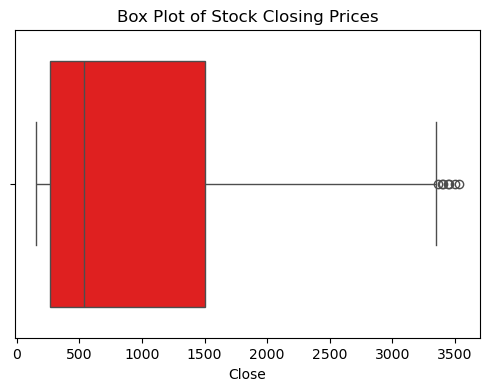

In [28]:
# Box Plot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Close"], color="red")
plt.title("Box Plot of Stock Closing Prices")
plt.show()

How many days witnessed a negative percentage change in their closing price?

In [30]:
# No of days with negative price change %
price_negative_changes = sum(df['Price Change %'] < 0)

print(price_negative_changes)

1166


### Working with Date-time data in Python

In Python, when working with date-related data in a DataFrame using Pandas, you often need to convert date strings to datetime objects and extract specific components like the year, month, day, etc.. Before proceeding further, you will create a new column `Year` which extracts the year from the `Date` column.
Here's how you can perform the above operation:

- To convert a column containing date strings to datetime objects, you can use the `pd.to_datetime()` function.

- Once the `Date` column is converted to datetime objects, you can extract the year from it using the `.dt.year` attribute and store it in the `Year` column

In [32]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [33]:
# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

In [34]:
# Check the dataframe again
# You would notice the Year column now
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Price Range,Price Change %,Year
0,2010-10-01,157.080002,157.440002,152.199997,153.710007,153.710007,8683400,5.240005,NaN,2010
1,2010-10-04,153.949997,155.960007,152.789993,155.389999,155.389999,5346500,3.170014,1.092962,2010
2,2010-10-05,157.080002,161.210007,157.009995,160.869995,160.869995,5620000,4.200012,3.526608,2010
3,2010-10-06,160.600006,160.679993,154.600006,155.399994,155.399994,6060800,6.079987,-3.400262,2010
4,2010-10-07,156.509995,157.399994,153.389999,156.270004,156.270004,4622000,4.009995,0.559852,2010


**Question 5: Total Trading Volume**  

Note that the `Volume` column denotes the total number of shares of the company's stock that were traded on that day. Let's say you want to calculate the total trading volume for each year in the data set (2010-2020)

Which year had the highest total trading volume?

In [36]:
# Group the data by year and calculate the total volume for each year
yearly_total_volume = df.groupby('Year')['Volume'].sum()

In [37]:
# Find the year with the maximum total volume
year_with_max_volume = yearly_total_volume.idxmax()

In [38]:
year_with_max_volume

2011

**Question 6: Average Closing Price for 2015**

Calculate the average closing price for the year 2015 (Round off to 2 decimal places)

In [40]:
# Group data by year and calculate average closing price
yearly_average_close = df.groupby('Year')['Close'].mean()

In [41]:
yearly_average_close

Year
2010     169.515312
2011     196.672024
2012     220.303640
2013     298.031588
2014     332.551033
2015     478.138295
2016     699.523135
2017     968.167012
2018    1641.726176
2019    1789.189206
2020    2507.917831
Name: Close, dtype: float64

In [42]:
# Average closing price for the year 2015
average_closing_price_2015 = yearly_average_close.loc[2015]

In [43]:
round(average_closing_price_2015,2)

478.14

**Question 7 : Bar Chart**

In the previous question, you had calculated the average closing price for 2015. Now let's dive a bit deeper.

Use a bar chart to find which month in 2015 had the least average closing price.

The bar chart should contain the following:

- Months along the X-axis
- Average closing price along the Y-axis
- Each bar should be labeled with the average closing price

**Hint**: Before solving this question, you also have to create a new column `Month` from the `Date` column

In [45]:
# Create the Month column
df['Month'] = df['Date'].dt.month

In [46]:
# Check the dataframe again
# There should be a Month column now
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Price Range,Price Change %,Year,Month
0,2010-10-01,157.080002,157.440002,152.199997,153.710007,153.710007,8683400,5.240005,NaN,2010,10
1,2010-10-04,153.949997,155.960007,152.789993,155.389999,155.389999,5346500,3.170014,1.092962,2010,10
2,2010-10-05,157.080002,161.210007,157.009995,160.869995,160.869995,5620000,4.200012,3.526608,2010,10
3,2010-10-06,160.600006,160.679993,154.600006,155.399994,155.399994,6060800,6.079987,-3.400262,2010,10
4,2010-10-07,156.509995,157.399994,153.389999,156.270004,156.270004,4622000,4.009995,0.559852,2010,10


In [47]:
# Filter the data for the year 2015
df_2015 = df[df['Date'].dt.year == 2015]

In [48]:
# Group the data by month and calculate the average closing price for each month
monthly_avg_closing_prices_2015 = df_2015.groupby('Month')['Close'].mean()

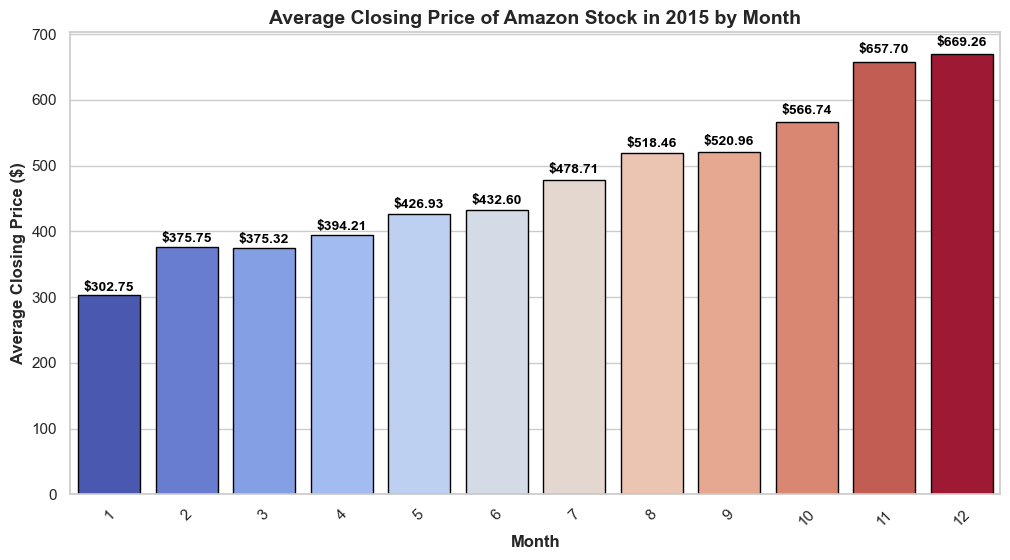

In [49]:
# Create a bar plot
# Months along the X-axis
# Average closing price along the Y-axis
# Each bar should be labeled with the average closing price
# Set Seaborn style



sns.set_theme(style="whitegrid")

# Create a figure
plt.figure(figsize=(12, 6))

# Create the bar plot with hue set to x and legend disabled
ax = sns.barplot(
    x=monthly_avg_closing_prices_2015.index, 
    y=monthly_avg_closing_prices_2015.values, 
    hue=monthly_avg_closing_prices_2015.index,  # Assigning x variable to hue
    palette="coolwarm",  
    edgecolor="black",
    legend=False  # Disabling the unnecessary legend
)

# Labels and title
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Average Closing Price ($)', fontsize=12, fontweight='bold')
plt.title('Average Closing Price of Amazon Stock in 2015 by Month', fontsize=14, fontweight='bold')

# Rotate x-axis labels
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)

# Add value labels on top of bars
for i, v in enumerate(monthly_avg_closing_prices_2015):
    ax.text(i, v + (v * 0.02), f'${v:,.2f}', ha='center', fontsize=10, fontweight='bold', color='black')

plt.show()

**Question 8: Risk**

Risk in stocks refers to the uncertainty or variability in the returns that an investor may experience when holding a particular stock. It represents the possibility of both favorable and unfavorable outcomes, including the potential for losses. Understanding and quantifying risk is crucial for investors, as it helps them make informed investment decisions and manage their portfolios effectively.

**Standard deviation** measures the dispersion or spread of a stock's returns around its average or expected return. A higher standard deviation indicates greater price volatility and is often used as a measure of risk.

In which year did the Amazon stock have the highest level of risk in its closing price?

In [51]:
# Group the data by year
grouped = df.groupby('Year')

# Calculate the standard deviation for each year
yearly_std_dev = grouped['Close'].std()

# Year with the maximum risk
max_risk_year = yearly_std_dev.idxmax()

In [52]:
max_risk_year

2020

### Correlation Matrix 
Finding relationships between stock metrics (e.g., Close, Volume, High, Low).

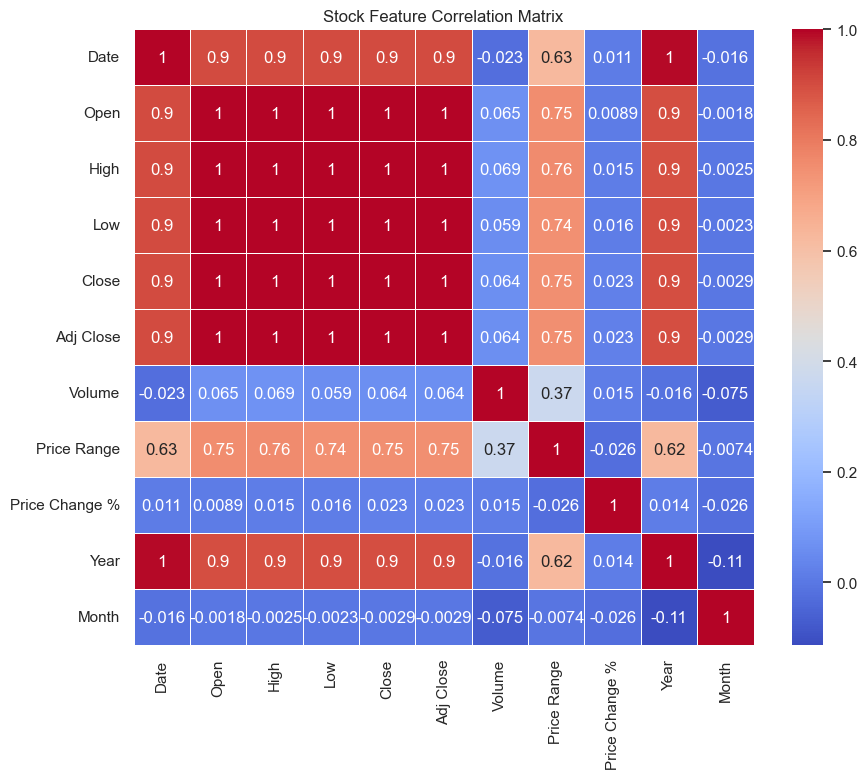

In [54]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Stock Feature Correlation Matrix")
plt.show()

**Key Correlation Insights :**

Strong Positive Correlation (~0.98-1.0): Open, High, Low, and Close move together.

Moderate Correlation (~0.3-0.6): Volume and Close show some relationship, but price doesn’t always follow volume.

Weak Correlation (~0.2-0.4): Volume fluctuates independently of Open, High, and Low.

Takeaway: Price trends are stable, but volume impacts vary.

#### Volatility & Risk Assessment 

Calculate Standard Deviation & Beta to assess risk.

Higher volatility = Higher risk & reward potential.

In [57]:
#  Helps understand investment risks.
df['Daily Return'] = df['Close'].pct_change()
volatility = df['Daily Return'].std()
print(f"Stock Volatility: {volatility:.4f}")

Stock Volatility: 0.0199


**Question 9: Candlestick Chart**

Candlestick charts are a valuable tool to visually interpret price data, understand market sentiment, and make trading decisions. They provide a concise and intuitive way to analyze historical price movements, identify potential opportunities, and manage risks in the financial markets.

Each candlestick consists of a rectangular "body" and two "wicks" or "shadows" extending from the top and bottom of the body. The body represents the price range between the opening and closing prices for a specific time period.
Stock-trading apps use candlestick charts extensively for analyzing trends in stock prices. These candlesticks are usually color-coded.

- A green or white candlestick typically indicates that the closing price was higher than the opening price, suggesting bullish (positive) sentiment.
- Conversely, a red or black candlestick represents a closing price lower than the opening price, signaling bearish (negative) sentiment.


You can read more about candlestick charts from this [link](https://www.investopedia.com/articles/active-trading/062315/using-bullish-candlestick-patterns-buy-stocks.asp).

A sample candlestick chart is shown below:


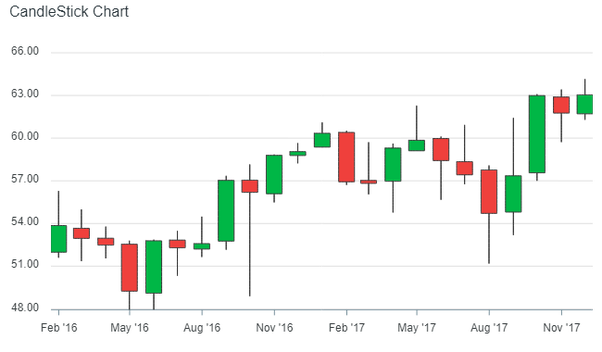

## Part 2: Stock Data Analysis for Multiple Stocks

In the next part of the assignment, you would be analyzing stocks from multiple companies - Apple (AAPL), Amazon(AMZN), Google (GOOG), Merck (MRK) and United Health(UNH). To keep things simple, we will only focus on the Closing Prices of all these stocks across a period of 10 years from 1st October 2010 to 30th September 2020.

In [61]:
# Read the data
data = pd.read_csv('Part2_data.csv')

In [62]:
print(data.info())  # Check data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2517 non-null   object 
 1   Close_AAPL  2517 non-null   float64
 2   Close_AMZN  2517 non-null   float64
 3   Close_GOOG  2517 non-null   float64
 4   Close_MRK   2517 non-null   float64
 5   Close_UNH   2517 non-null   float64
dtypes: float64(5), object(1)
memory usage: 118.1+ KB
None


In [63]:
data.head()

,Date,Close_AAPL,Close_AMZN,Close_GOOG,Close_MRK,Close_UNH
0,01-10-2010,10.090000,153.710007,261.828613,36.599998,35.430000
1,04-10-2010,9.951428,155.389999,260.199707,36.520000,34.540001
2,05-10-2010,10.319285,160.869995,268.110046,37.020000,35.070000
3,06-10-2010,10.328215,155.399994,266.177307,37.009998,33.950001
4,07-10-2010,10.329286,156.270004,264.015411,36.709999,34.340000


Before proceeding further, convert the Date column to Datetime format as you did in Part 1 of this assignment

In [65]:
# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

In [66]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, errors='coerce')

**Question 1 : Line Chart**

Create a Line Chart depicting closing prices over time (2010-2020) for all the companies - AAPL, AMZN, GOOG, MRK, and UNH


Here's how your line chart should look like:

- Date should be along the X-axis
- The line chart depicting the stock price should be along the Y-axis
- The line charts for all the companies should be in the same view. Each company's line chart should be in a different color

Based on the line chart , which of the following statements is most accurate?

A) AAPL consistently had the highest closing price throughout the entire period.

B) GOOG had the highest closing price in the initial years but was surpassed by AMZN in the later years.

C) MRK experienced significant fluctuations in closing price compared to the other companies.

D) The closing prices for all companies followed an almost identical trend throughout the entire period.


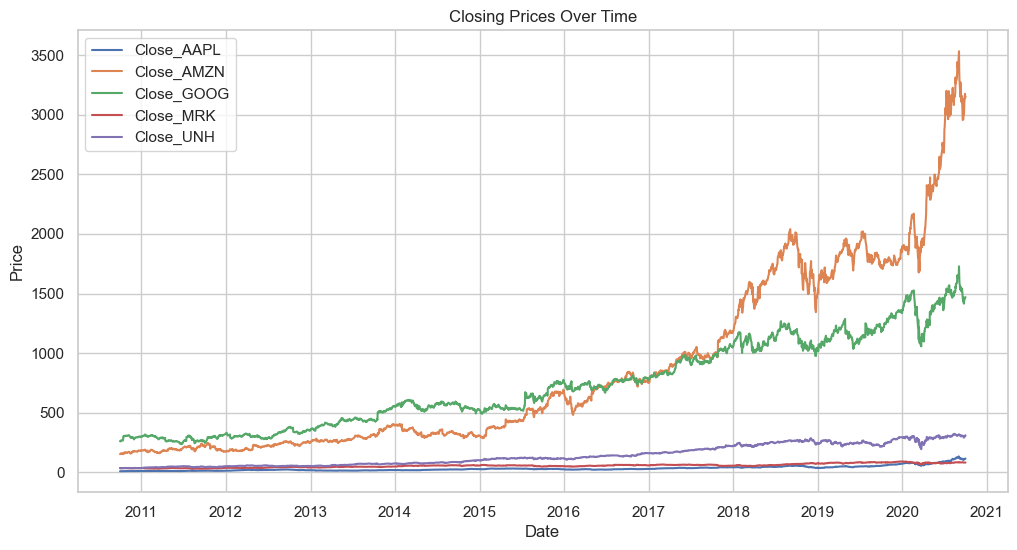

In [68]:
# Plot line charts
# Date should be along the X-axis
# The line chart depicting the stock price should be along the Y-axis
# The line charts for all the companies should be in the same view. Each company's line chart should be in a different color

plt.figure(figsize=(12, 6))
for col in ['Close_AAPL', 'Close_AMZN', 'Close_GOOG', 'Close_MRK', 'Close_UNH']:
    plt.plot(data['Date'], data[col], label=col)

plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

**Question 2: Scatter Plot**

Scatter Plots are pretty useful in analyzing the relationship between 2 numeric variables. It indicates whether changes in one variable are related to, or can predict, changes in another variable. Or in other words, you can identify the correlation (either positive or negative) between the two variables.

Create a scatter plot to determine the type of correlation that exists between the stock prices of `AAPL` and `AMZN`

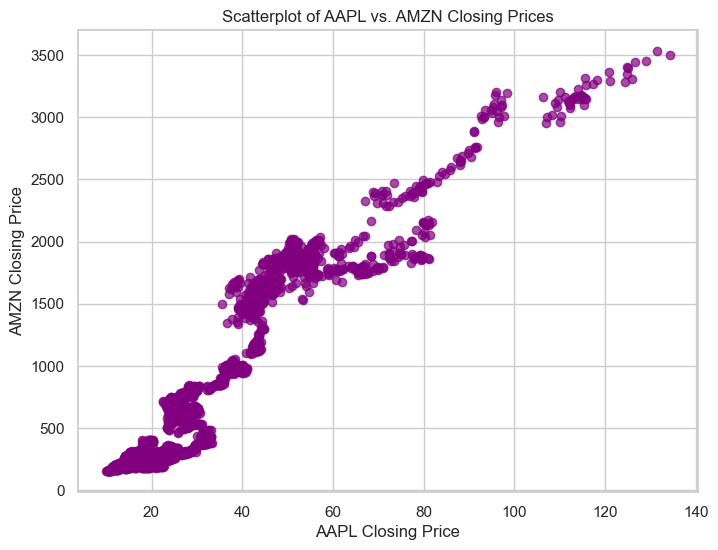

In [71]:
# Create a scatterplot to visualize the relationship between AAPL and AMZN closing prices
plt.figure(figsize=(8, 6))
plt.scatter(data['Close_AAPL'], data['Close_AMZN'], color='purple', alpha=0.7)
plt.title('Scatterplot of AAPL vs. AMZN Closing Prices')
plt.xlabel('AAPL Closing Price')
plt.ylabel('AMZN Closing Price')
plt.show()

Since the above chart only helps us in visualizing the correlation between two stocks, we can go for another interesting plot which would enable us to analyse the correlation of stocks for different companies all at once. This is very useful in finance world, as you can identify which stocks to buy for building your portfolio


**Question 3: Correlation Heatmap**

A correlation matrix is a square matrix that quantifies the pairwise relationships between variables in a dataset, with values ranging from -1 to 1, indicating the strength and direction of associations between the different variables

Heatmaps are a data visualization technique used to represent the distribution, density, or intensity of a phenomenon across a two-dimensional space. Heatmaps are typically presented as a grid of colored cells or rectangles, with each cell's color indicating the value of the underlying data at that specific location.

You can combine the above two and create a correlation heatmap to analyze the correlations between the stock prices of all the companies in a single view.

Create a correlation heatmap to determine which among the following pairs of stocks depict the highest correlation between them. Here are some additional instructions on how to build the heatmap

- The heatmap should have a single color mapping
- Different shades of the same color should indicate the value represented in each cell of the heatmap (the darker the shade, the higher the value)

A) GOOG, UNH

B) AAPL, AMZN

C) MRK, UNH

D) GOOG, AAPL

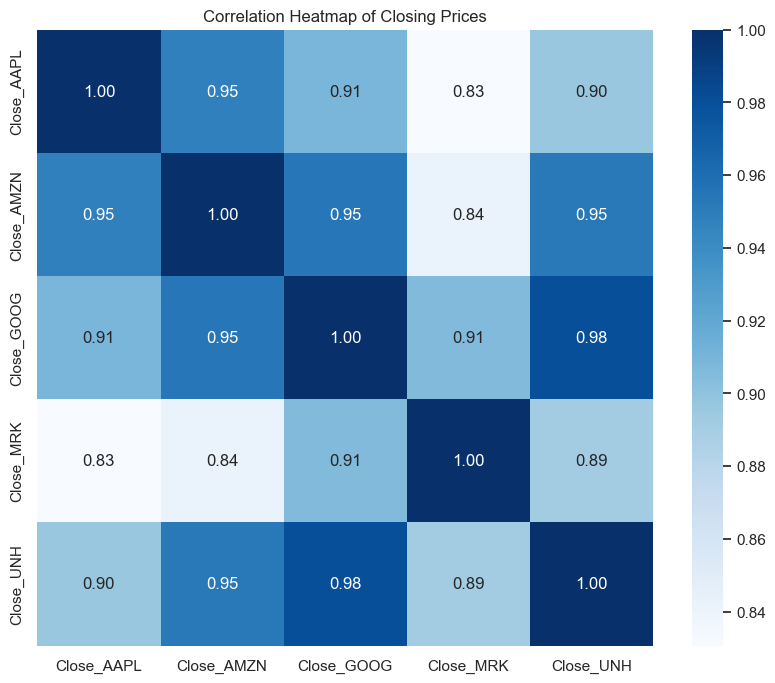

In [75]:
# Calculate the correlation matrix
corr_matrix = data[['Close_AAPL', 'Close_AMZN', 'Close_GOOG', 'Close_MRK', 'Close_UNH']].corr()

# Plot the heatmap with a single color
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', square=True, cmap='Blues')
plt.title('Correlation Heatmap of Closing Prices')
plt.show()

## Part 3: Comparative Analysis

Plot the distribution of the `Volume` column from the `Part1_data.csv` dataset and the `Close_AMZN` column from the `Part2_data.csv` dataset. Use both histograms and KDE (Kernel Density Estimation) plots to visualise the distribution. Identify any potential outliers in both cases.

Guidelines:

Load the datasets.

Use matplotlib or seaborn to create the plots.

For histograms, choose appropriate bin sizes.

Combine both a histogram and a KDE plot for better comparison.

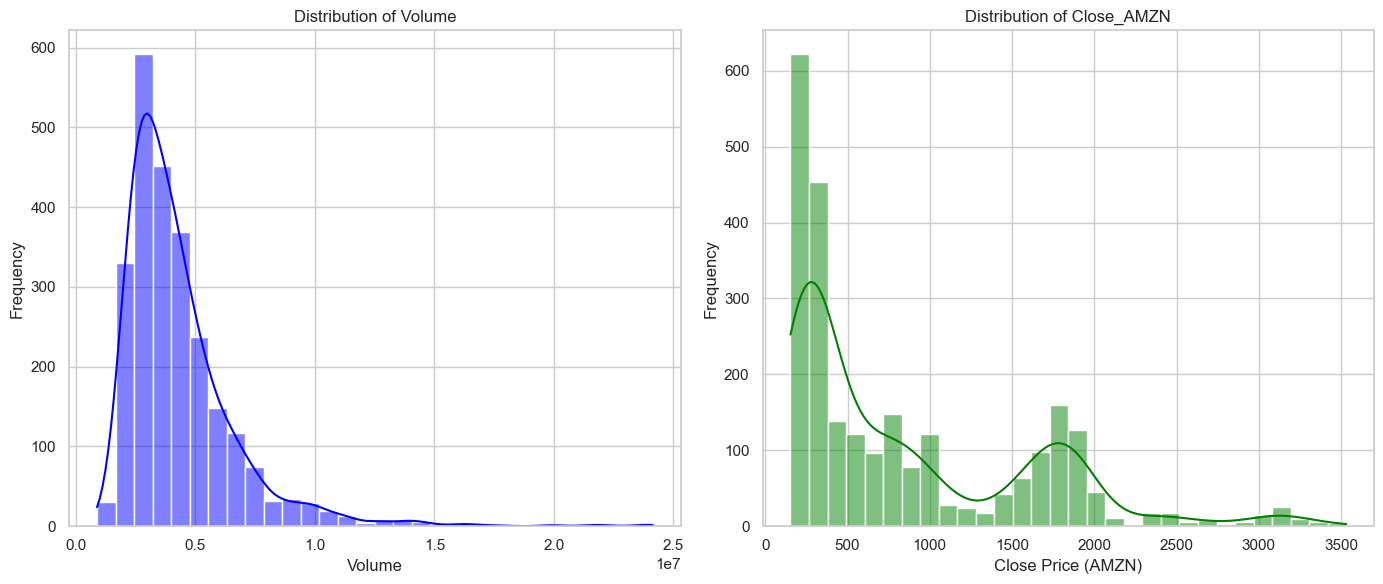

In [77]:
# Load the datasets
part1_df = pd.read_csv('Part1_data.csv')
part2_df = pd.read_csv('Part2_data.csv')

# Plotting the distribution of 'Volume' from Part1_data.csv
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(part1_df['Volume'], bins=30, kde=True, color='blue')
plt.title('Distribution of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')

# Plotting the distribution of 'Close_AMZN' from Part2_data.csv
plt.subplot(1, 2, 2)
sns.histplot(part2_df['Close_AMZN'], bins=30, kde=True, color='green')
plt.title('Distribution of Close_AMZN')
plt.xlabel('Close Price (AMZN)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### POTENTIAL OUTLIERS ANALYSIS

In [79]:
# Identifying Outliers
volume_outliers = part1_df["Volume"][np.abs(part1_df["Volume"] - part1_df["Volume"].mean()) > (3 * part1_df["Volume"].std())]
amzn_outliers = part2_df["Close_AMZN"][np.abs(part2_df["Close_AMZN"] - part2_df["Close_AMZN"].mean()) > (3 * part2_df["Close_AMZN"].std())]

print("\nPotential Outliers in Volume (Part 1):")
print(volume_outliers)
print("\nPotential Outliers in Close_AMZN (Part 2):")
print(amzn_outliers)


Potential Outliers in Volume (Part 1):
14      13482500
15      16318400
81      14594400
82      19908200
143     23623000
206     12955600
242     11753000
250     14436900
269     14012600
270     24134200
304     11614200
335     12772200
336     21336600
347     12563800
396     22116900
585     13075400
645     14030000
772     12036800
838     16154800
882     12534600
896     16180200
897     14479800
959     17846500
1023    19801100
1089    23856100
1147    17176900
1210    21909400
1339    14015200
1340    14677600
1539    12747000
1781    16565000
1852    14141500
1884    13705300
1885    12581100
1905    13053200
2021    13935900
2032    14963800
2033    13866100
2034    12460100
2070    13640300
2348    15567300
2400    12038200
Name: Volume, dtype: int64

Potential Outliers in Close_AMZN (Part 2):
2458    3182.629883
2459    3200.000000
2460    3104.000000
2465    3196.840088
2466    3138.290039
2467    3099.909912
2474    3164.679932
2475    3111.889893
2476    3138.83

In [80]:
# Capping extreme values
# Instead of removing them, we can cap them at the 1st and 99th percentiles:

lower_vol, upper_vol = np.percentile(part1_df["Volume"], [1, 99])
lower_amzn, upper_amzn = np.percentile(part2_df["Close_AMZN"], [1, 99])

part1_df["Volume"] = np.clip(part1_df["Volume"], lower_vol, upper_vol)
part2_df["Close_AMZN"] = np.clip(part2_df["Close_AMZN"], lower_amzn, upper_amzn)

In [81]:
# Transform Data (Log Transform)
# If the data is heavily skewed due to outliers, apply a log transformation:
part1_df["Volume"] = np.log1p(part1_df["Volume"])
part2_df["Close_AMZN"] = np.log1p(part2_df["Close_AMZN"])

In [82]:
print(part1_df["Volume"].describe())
print(part2_df["Close_AMZN"].describe())

count    2517.000000
mean       15.166501
std         0.444668
min        14.299847
25%        14.834142
50%        15.126785
75%        15.446906
max        16.443100
Name: Volume, dtype: float64
count    2517.000000
mean        6.375105
std         0.874336
min         5.111048
25%         5.589082
50%         6.281799
75%         7.313887
max         8.059290
Name: Close_AMZN, dtype: float64


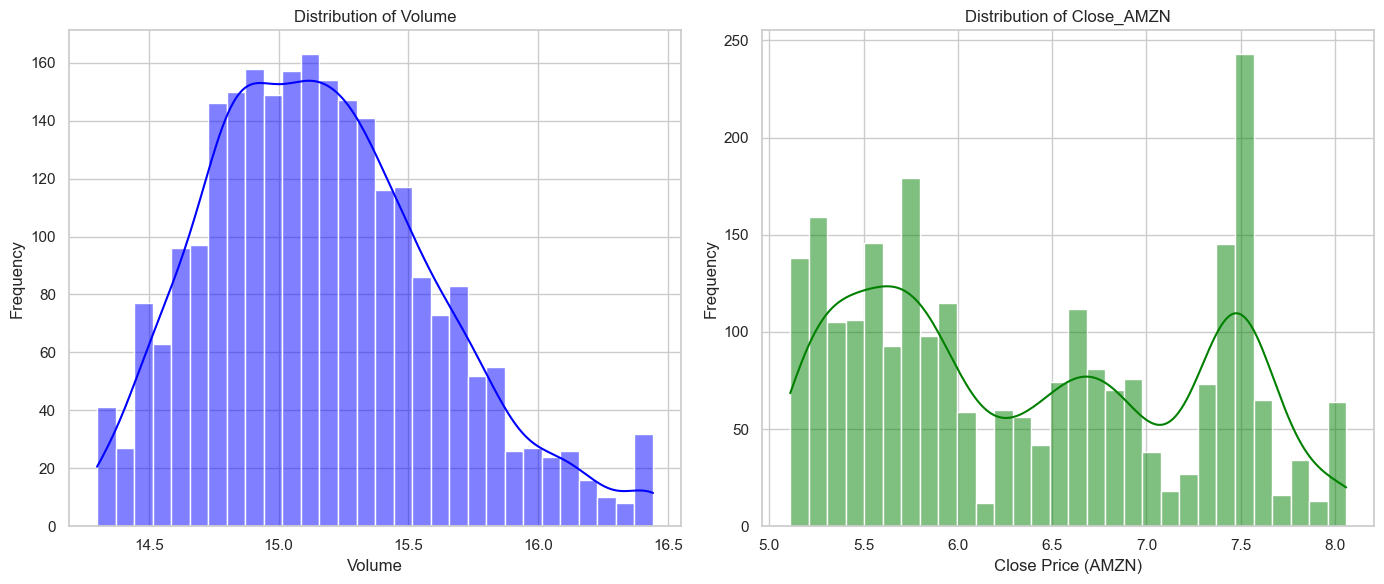

In [83]:
# Plotting the distribution of 'Volume' from Part1_data.csv
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(part1_df['Volume'], bins=30, kde=True, color='blue')
plt.title('Distribution of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')

# Plotting the distribution of 'Close_AMZN' from Part2_data.csv
plt.subplot(1, 2, 2)
sns.histplot(part2_df['Close_AMZN'], bins=30, kde=True, color='green')
plt.title('Distribution of Close_AMZN')
plt.xlabel('Close Price (AMZN)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## TREND ANALYSIS

Let's calculate trend analysis one by one for each stock,

I'll generate its 30-day and 100-day moving averages and analyze the trend. 

## AAPL

In [87]:
# Extract relevant columns for AAPL
data['30-day MA AAPL'] = data['Close_AAPL'].rolling(window=30).mean()
data['100-day MA AAPL'] = data['Close_AAPL'].rolling(window=100).mean()

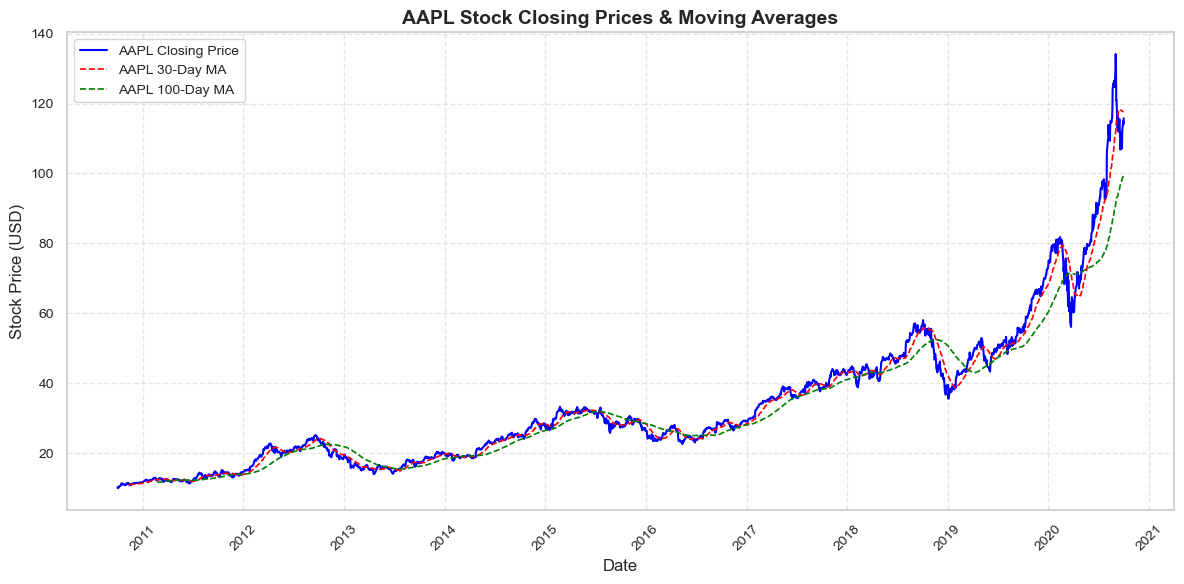

In [88]:
# Plot AAPL Closing Prices & Moving Averages
plt.figure(figsize=(12, 6))
sns.lineplot(x=data['Date'], y=data['Close_AAPL'], label='AAPL Closing Price', color='blue', linewidth=1.5)
sns.lineplot(x=data['Date'], y=data['30-day MA AAPL'], label='AAPL 30-Day MA', color='red', linestyle='dashed', linewidth=1.2)
sns.lineplot(x=data['Date'], y=data['100-day MA AAPL'], label='AAPL 100-Day MA', color='green', linestyle='dashed', linewidth=1.2)

# Formatting
plt.title('AAPL Stock Closing Prices & Moving Averages', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show plot
plt.show()

**Analysis:**

- Upward Trend: The closing price shows a consistent increase over time.

- Short-Term vs. Long-Term:

30-day MA (red, dashed) reacts to short-term fluctuations.

100-day MA (green, dashed) smooths out longer trends.

- Crossovers:

When 30-day MA crosses 100-day MA upwards, it's a bullish signal (buy).

When it crosses downwards, it's a bearish signal (sell).

## AMZN

In [91]:
# Compute moving averages for AMZN
data['30-day MA AMZN'] = data['Close_AMZN'].rolling(window=30).mean()
data['100-day MA AMZN'] = data['Close_AMZN'].rolling(window=100).mean()

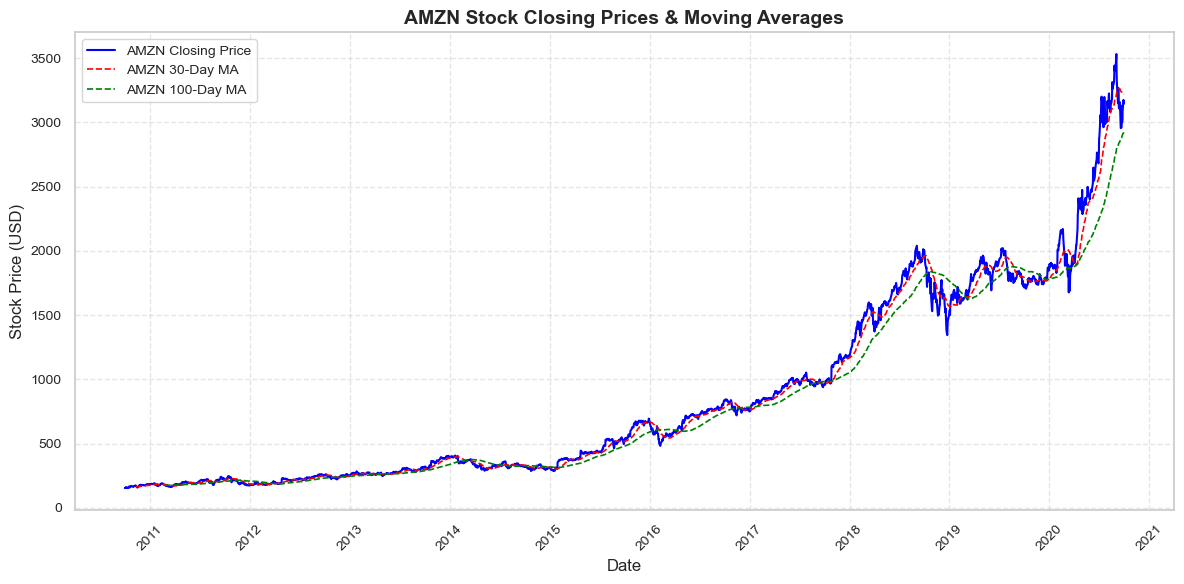

In [92]:
# Plot AMZN Closing Prices & Moving Averages
plt.figure(figsize=(12, 6))

sns.lineplot(x=data['Date'], y=data['Close_AMZN'], label='AMZN Closing Price', color='blue', linewidth=1.5)
sns.lineplot(x=data['Date'], y=data['30-day MA AMZN'], label='AMZN 30-Day MA', color='red', linestyle='dashed', linewidth=1.2)
sns.lineplot(x=data['Date'], y=data['100-day MA AMZN'], label='AMZN 100-Day MA', color='green', linestyle='dashed', linewidth=1.2)

# Formatting
plt.title('AMZN Stock Closing Prices & Moving Averages', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show plot
plt.show()

**Analysis**
- The blue line represents the actual closing price of GOOG.
- The red dashed line shows the 30-day moving average (short-term trend).
- The green dashed line shows the 100-day moving average (long-term trend).
- If the 30-day MA crosses above the 100-day MA, it signals a potential uptrend.
- If the 30-day MA crosses below the 100-day MA, it signals a potential downtrend.

## GOOG

In [95]:
# Compute moving averages for GOOG
data['30-day MA GOOG'] = data['Close_GOOG'].rolling(window=30).mean()
data['100-day MA GOOG'] = data['Close_GOOG'].rolling(window=100).mean()

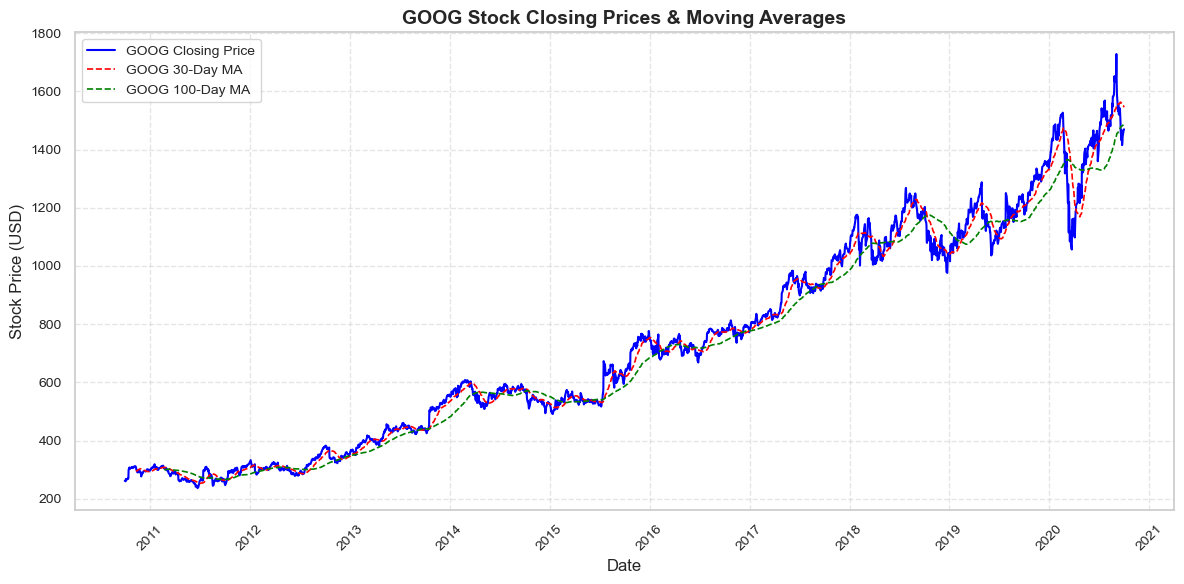

In [96]:
# Plot GOOG Closing Prices & Moving Averages
plt.figure(figsize=(12, 6))

sns.lineplot(x=data['Date'], y=data['Close_GOOG'], label='GOOG Closing Price', color='blue', linewidth=1.5)
sns.lineplot(x=data['Date'], y=data['30-day MA GOOG'], label='GOOG 30-Day MA', color='red', linestyle='dashed', linewidth=1.2)
sns.lineplot(x=data['Date'], y=data['100-day MA GOOG'], label='GOOG 100-Day MA', color='green', linestyle='dashed', linewidth=1.2)

# Formatting
plt.title('GOOG Stock Closing Prices & Moving Averages', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show plot
plt.show()

**Analysis**
- The blue line represents the actual closing price of GOOG.
- The red dashed line shows the 30-day moving average (short-term trend).
- The green dashed line shows the 100-day moving average (long-term trend).
- If the 30-day MA crosses above the 100-day MA, it signals a potential uptrend.
- If the 30-day MA crosses below the 100-day MA, it signals a potential downtrend

## MRK 

In [99]:
# Compute moving averages for MRK 
data['30-day MA MRK'] = data['Close_MRK'].rolling(window=30).mean()
data['100-day MA MRK'] = data['Close_MRK'].rolling(window=100).mean()

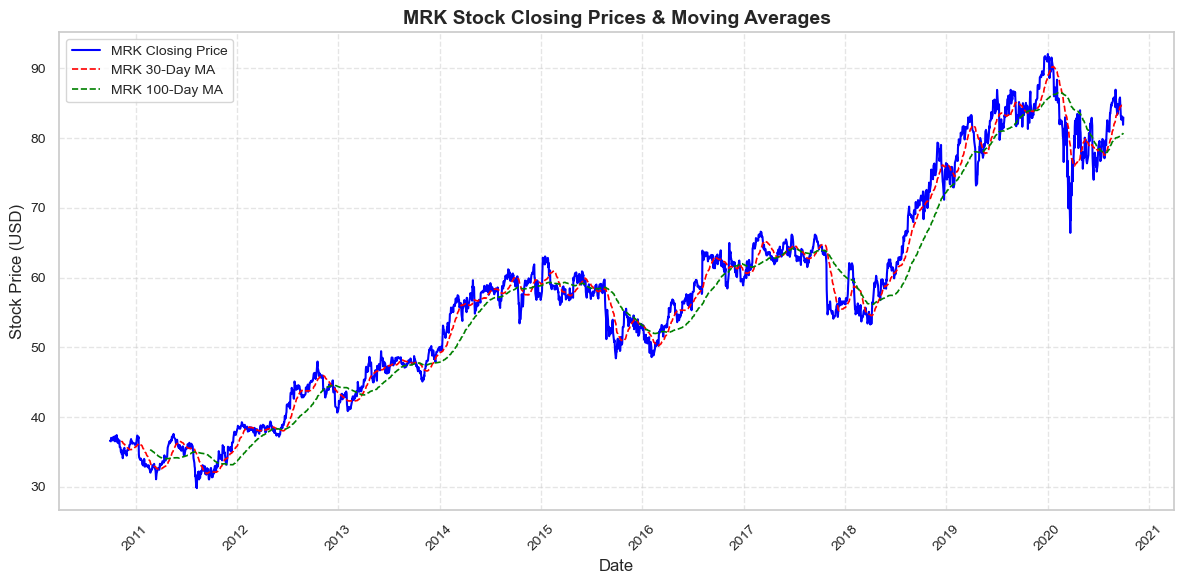

In [100]:
# Plot MRK Closing Prices & Moving Averages
plt.figure(figsize=(12, 6))

sns.lineplot(x=data['Date'], y=data['Close_MRK'], label='MRK Closing Price', color='blue', linewidth=1.5)
sns.lineplot(x=data['Date'], y=data['30-day MA MRK'], label='MRK 30-Day MA', color='red', linestyle='dashed', linewidth=1.2)
sns.lineplot(x=data['Date'], y=data['100-day MA MRK'], label='MRK 100-Day MA', color='green', linestyle='dashed', linewidth=1.2)

# Formatting
plt.title('MRK Stock Closing Prices & Moving Averages', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show plot
plt.show()

**Analysis**
- The blue line represents the actual closing price of MRK.
- The red dashed line shows the 30-day moving average (short-term trend).
- The green dashed line shows the 100-day moving average (long-term trend).
- If the 30-day MA crosses above the 100-day MA, it signals a potential uptrend.
- If the 30-day MA crosses below the 100-day MA, it signals a potential downtrend.

## UNH

In [103]:
# Compute moving averages for UNH 
data['30-day MA UNH'] = data['Close_UNH'].rolling(window=30).mean()
data['100-day MA UNH'] = data['Close_UNH'].rolling(window=100).mean()


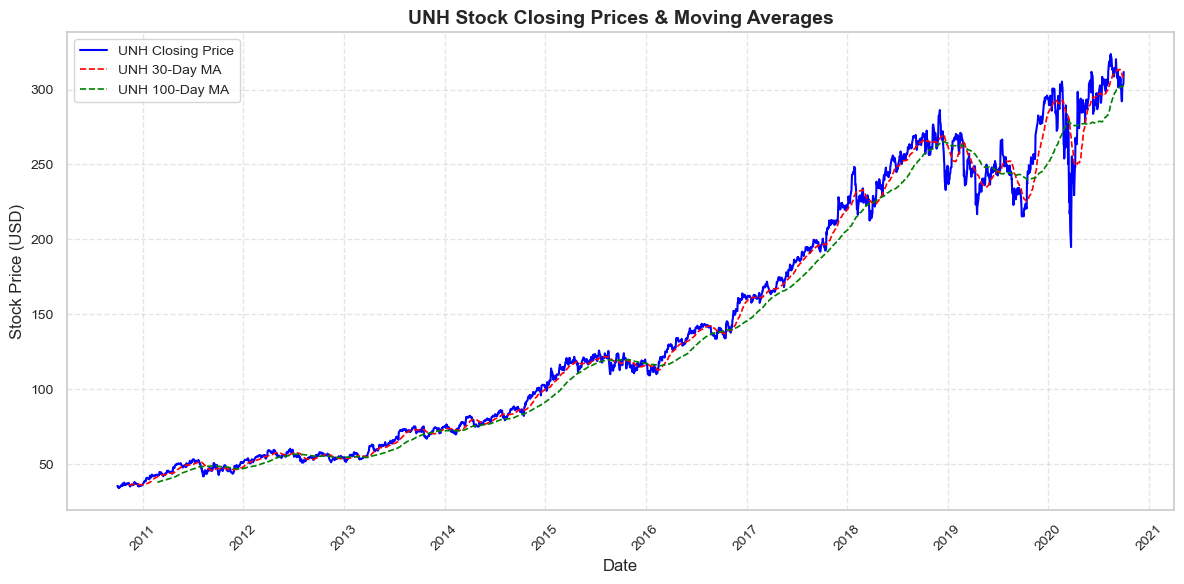

In [104]:
# Plot UNH Closing Prices & Moving Averages
plt.figure(figsize=(12, 6))

sns.lineplot(x=data['Date'], y=data['Close_UNH'], label='UNH Closing Price', color='blue', linewidth=1.5)
sns.lineplot(x=data['Date'], y=data['30-day MA UNH'], label='UNH 30-Day MA', color='red', linestyle='dashed', linewidth=1.2)
sns.lineplot(x=data['Date'], y=data['100-day MA UNH'], label='UNH 100-Day MA', color='green', linestyle='dashed', linewidth=1.2)

# Formatting
plt.title('UNH Stock Closing Prices & Moving Averages', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show plot
plt.show()

**Analysis**
- The blue line represents the actual closing price of UNH.
- The red dashed line shows the 30-day moving average (short-term trend).
- The green dashed line shows the 100-day moving average (long-term trend).
- If the 30-day MA crosses above the 100-day MA, it signals a potential uptrend.
- If the 30-day MA crosses below the 100-day MA, it signals a potential downtrend.